In [3]:
import pandas as pd

In [7]:
df = pd.read_csv('ETTh1.csv', header=0)

display(df.head())

df['date'] = pd.to_datetime(df['date'])
# drop date
df = df.drop(columns=['date'])
display(df.head())

# write to csv
df.to_csv('ETTh1-clean.csv', index=False, header=False)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [15]:
df = pd.read_csv('rcalix.csv', header=0)
display(df.head())
print(df.shape)

# remove first column, it's just an index
df = df.drop(columns=['Unnamed: 0'])

df = df.dropna() # i think axis=1 drops columns
# drop any columns with str
df = df.drop(df.select_dtypes(['object']), axis=1)

# drop any column with the min and max being the same.
# this will cause a division by zero error
df = df.loc[:, (df != df.iloc[0]).any()]

display(df.head())
print(df.shape)

df.to_csv('rcalix-clean.csv', index=False, header=False)

,Unnamed: 0,delta_SI,mov_avg_SI,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0,0.000000,0.0,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,...,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,1,0.000000,0.0,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,...,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,2,-0.044380,0.0,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,...,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,3,0.009040,0.0,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,...,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,4,0.101686,0.0,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,...,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0


(1394, 37)


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,min,hour,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.0,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,45,0,...,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.0,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,43,8,...,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.0,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,17,10,...,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.0,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,40,12,...,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.0,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,6,15,...,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0


(1394, 34)


In [ ]:
import warnings

norm_df = (df - df.min()) * (50_257-2 / (df.max() - df.min()))
print(f"{df.min()} {df.max()}")

display(norm_df.head())

# TODO should give more info
with warnings.catch_warnings():
    warnings.filterwarnings('error')
    for i, v in enumerate(norm_df.values.flatten()):
        try:
            token = v.astype(int)
        except RuntimeWarning:
            print(f'Error at {i} with value {v}')
            print(df.values.flatten()[i])
            break

Unnamed: 0                    0.000000
delta_SI                     -1.379060
mov_avg_SI                   -0.163136
SI_f1                         0.391000
HOST_BLAST_MOISTURE_f3        2.233827
HOT_BLAST_TMP_NS_f3        1899.823331
NAT_GAS _INJECTION_f3         3.433228
WINDRATE_f3                 159.631842
HIGH_PURITY_OXYGEN_f3         0.000000
sec                           0.000000
min                           0.000000
hour                          0.000000
day                           1.000000
month                         1.000000
year                       2021.000000
COAL_FLOW_f3                  0.000000
Cast_Avg_Mn_f2                0.212000
Slag_Fe_f2                    0.000000
CNUM                          2.000000
Selec_Top_Gas_CO_f3          19.930137
Selec_Top_Gas_CO2_f3          8.350458
Selec_Top_Gas_H2_f3           1.257904
Selec_Top_Gas_N2_f3          51.537121
NE_Uptake_f3                128.995248
SE_Uptake_f3                141.192433
NW_Uptake_f3             

,Unnamed: 0,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,sec,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,69306.738599,8197.938446,16509.186094,100946.629749,1.314732e+07,4.675614e+08,1.265810e+06,0.0,NaN,...,3.260379e+06,294002.572286,255304.515375,144236.322732,598769.587371,225959.557969,544408.497094,0.0,5.352061e+07,552826.948598
1,50256.998564,69306.738599,8197.938446,16056.159032,97524.289052,1.348976e+07,4.690451e+08,1.324854e+06,0.0,NaN,...,3.253023e+06,202032.612810,231683.942982,102523.381387,598769.587371,219139.198105,558498.647558,0.0,5.352061e+07,552826.948598
2,100513.997128,67076.355420,8197.938446,13825.786300,95101.971944,1.346665e+07,4.732082e+08,1.316563e+06,0.0,NaN,...,3.557451e+06,167355.254137,262843.113859,107549.056579,598769.587371,218976.197751,542714.027269,100512.0,5.350494e+07,552826.948598
3,150770.995693,69761.045741,8197.938446,14280.091314,94830.173357,1.342623e+07,4.804937e+08,1.321388e+06,0.0,NaN,...,2.587158e+06,125139.481588,228165.981585,91969.501785,598769.587371,217787.250661,556296.610387,0.0,5.216612e+07,552826.948598
4,201027.994257,74417.108928,8197.938446,19390.437708,94809.855520,1.339657e+07,4.847194e+08,1.322316e+06,0.0,NaN,...,2.935705e+06,143734.659144,231683.942982,87446.403656,598769.587371,219070.970202,547193.642473,100512.0,5.412339e+07,552826.948598


Error at 9 with value nan
0.0


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
1,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
2,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
3,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
4,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35


11597


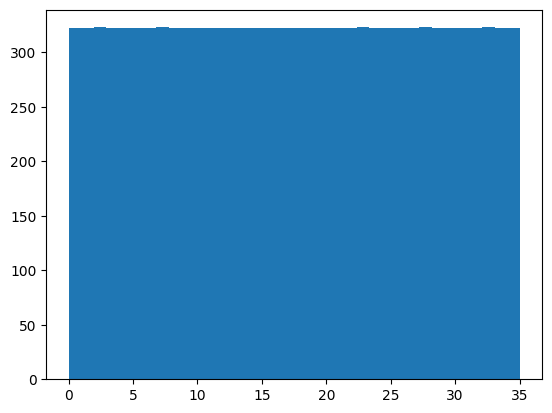

,value,count
0,0,322
1,1,322
2,2,323
3,3,322
4,4,322
5,5,322
6,6,322
7,7,323
8,8,322
9,9,322


In [43]:
import numpy as np
import pandas as pd

# create row of 35 values from 0 to 34
row = np.arange(36)

# repeat a bunch of times
df = pd.DataFrame(np.tile(row, (10000, 1)))

display(df.head())

tokens = df.values.flatten()

dataset = []
real = []
max_length = 512
stride = 31 # 64 -> 3 7 11 15 19 23 27 31 35
for i in range(0, len(tokens) - max_length, stride):
    sequence = tokens[i:i + max_length]
    if len(sequence) == max_length:
        input_sequence = np.array(sequence[:-1])#, dtype=np.int64) # dont include the last token
        target_sequence = np.array(sequence[1:])#, dtype=np.int64) # dont include the first token

        dataset.append({
            'input_ids': input_sequence,
            'labels': target_sequence
        })
        real.append(target_sequence[-1])

print(len(dataset))

# get the distribution of the last token and put in histogram
import matplotlib.pyplot as plt
plt.hist(real, bins=36)
plt.show()

# check distribution of dataset values
# if the distribution is the same as the original dataset, then the dataset is good
# if the dist of the last is equal, then the dataset should follow

# put unique values in a dataframe
unique = set(real)
df = pd.DataFrame(real, columns=['value'])
df['count'] = 1
df = df.groupby('value').count().reset_index()
# df.drop(columns=['value'], inplace=True)
display(df)
